Keaton Spiller

CS441 Spring 2022

Assignment 2

8 Queens Problem

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# 4,426,165,368 possible arrangements of eight queens on an 8×8 board

def fitness_pairs_queens(permutation):
    score = 0
    for x1, y1 in enumerate(permutation): #  0,1,2,3,4,5,6,7
        for x2, y2 in enumerate(permutation): # 0,1,2,3,4,5,6,7
            if((x1,y1) != (x2,y2) ):
                if(abs(y2-y1) == abs(x2-x1)): # Diagonal
                    score += 1
                if(x1 == x2): # vertical
                    score+= 1
                if(y1 == y2): # Horizontal
                    score +=1
    return(score//2)

def Initial_Population(PopulationSize, ):
    population = []
    rows = [0,1,2,3,4,5,6,7]
    score = []
    for i in range(PopulationSize):
        permutation = np.random.choice(rows, 8, replace=True )
        population.append(permutation)
        score.append(fitness_pairs_queens(permutation))

    return (population, score)

def normalized_fitness(score):
    normalized_score = score
    total = np.sum(score)
    for i, f in enumerate(score):
        normalized_score[i] = f /total

    return(normalized_score, total)

def Selection_of_parents(population, score, parent1_score, parent2_score, parent1_state, parent2_state):

    for i,state in enumerate(population):
        current_score = score[i]
        if (current_score <= parent1_score ):

            temp_score = parent1_score
            temp_state = parent1_state

            parent1_score = current_score
            parent1_state = state
            if((parent1_state != state).all()):
                parent2_score = temp_score
                parent2_state = temp_state
        if(current_score < parent2_score  and ((parent1_state != state).all()) ):
            parent2_score = current_score
            parent2_state = state

    return (parent1_state, parent2_state, parent1_score, parent2_score)

def mutate(child, MutationPct):

    MutationPct = int(MutationPct * 100)
    rand_percent = np.random.randint(1, 101) # 1 - 100 inclusive to exclusive
    if(rand_percent <= MutationPct):
        rand_index = np.random.randint(0, 8) # 0-9
        rand_value = np.random.randint(0, 8)
        child[rand_index] = rand_value

    return child

def CrossOver(parent1_state, parent2_state, MutationPct):
    
    # middles of 0-1=1, 1-2=2, 2-3=3, 3-4=4, 4-5=5, 5-6=6, 6-7=7
    middle = [1,2,3,4,5,6,7] 
    slice = int(np.random.choice(middle, 1, replace=True ))
    left_child_one =parent1_state[0:slice+1]
    right_child_one = parent2_state[slice+1:]

    left_child_two = parent2_state[0:slice+1]
    right_child_two =  parent1_state[slice+1:]
    child1 = np.concatenate((left_child_one, right_child_one))
    child2 = np.concatenate((left_child_two, right_child_two))

    child1 = mutate(child1, MutationPct)
    child2 = mutate(child2, MutationPct)

    return(child1, child2)

def genetic_algorithm(PopulationSize,MutationPct,iterations):

    parent1_score,parent2_score = 100,100
    parent1_state, parent2_state = np.array([]),np.array([])
    avg_fitness = []
    initial_population, initial_score = Initial_Population(PopulationSize)
    score, current_total = normalized_fitness(initial_score)
    avg_fitness.append(np.sum(score)/len(score))

    initial_parent1_state, initial_parent2_state, initial_parent1_score, initial_parent2_score = Selection_of_parents(initial_population,
                                                                                                                        score, 
                                                                                                                        parent1_score, 
                                                                                                                        parent2_score, 
                                                                                                                        parent1_state, 
                                                                                                                        parent2_state)
    population = initial_population                                                                            

    for generation in range(0,iterations):
        
        parent1_state, parent2_state, parent1_score, parent2_score = Selection_of_parents(population,
                                                                                            score, 
                                                                                            parent1_score, 
                                                                                            parent2_score, 
                                                                                            parent1_state, 
                                                                                            parent2_state)
        
        child1, child2 = CrossOver(parent1_state, parent2_state, MutationPct)
        num_queens_child1 = fitness_pairs_queens(child1)
        num_queens_child2 = fitness_pairs_queens(child2)
        
        current_total = current_total + num_queens_child1 + num_queens_child2
        child1_score = num_queens_child1/current_total
        child2_score = num_queens_child2/current_total

        score.append(child1_score)
        score.append(child2_score)
        population.append(child1)
        population.append(child2)

        avg_fitness.append(np.sum(score)/len(score))
        
    return(initial_parent1_state, initial_parent2_state,initial_population, parent1_state, parent2_state, population,avg_fitness)

PopulationSize = 1000 # experiment with 10, 100, 500, 1000
MutationPct = 0.05 # 5 percent mutate rate
iterations = 1000 # iterations to run

initial_parent1, initial_parent2,initial_population, parent1_state, parent2_state, population, avg_fitness =  genetic_algorithm(PopulationSize,
                                                                                                                                MutationPct,
                                                                                                                                iterations)


In [107]:
samples_wanted = 3
# Initial Parents
print(f"initial parents: {initial_parent1} {initial_parent2}")
print(f"random samples from initial population:")
for sample in range(samples_wanted):
    rand_init_idx = np.random.randint(0, PopulationSize+1) # inclusive to exclusive
    random_initial_population = initial_population[rand_init_idx]
    print(f"{random_initial_population}")

# Final Parents
print(f"Final parents: {parent1_state} {parent2_state} ")
print(f"random samples from final population:")
for sample in range(samples_wanted):
    children_generated = (iterations*2)
    rand_final_idx = np.random.randint(0, children_generated+1) # inclusive to exclusive
    random_final_population = population[rand_final_idx]
    print(f"{random_final_population}")

initial parents: [4 7 5 0 6 1 7 5] [1 5 4 0 0 3 6 7]
random samples from initial population:
[1 4 5 1 2 7 3 2]
[3 4 7 3 2 4 5 4]
[0 5 5 0 3 1 0 7]
Final parents: [4 7 3 0 6 1 1 5] [1 5 4 0 0 3 6 7] 
random samples from final population:
[6 7 0 7 3 6 5 2]
[1 3 4 5 2 3 3 3]
[1 5 4 0 0 3 6 5]


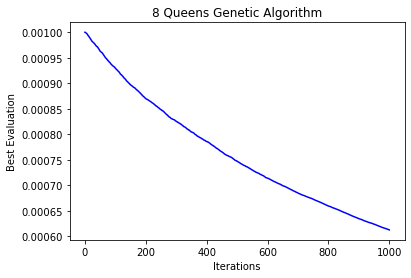

In [108]:
#In your write-up include a plot of the average fitness (vertical axis) to population generation number (horizontal axis).
iteration_axis = np.arange(iterations+1) # 1 extra iteration to account for initial generation
plt.xlim=(0,iterations+1)
plt.title("8 Queens Genetic Algorithm") 
plt.xlabel("Iterations") 
plt.ylabel("Best Evaluation") 
plt.plot(iteration_axis,avg_fitness,color='b') 
plt.show()